In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math  # for rounding up values
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime  # for strptime
import datetime
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from seaborn import heatmap
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_1.csv', converters={'PARTY_ID': str})
df['ETD_POL_D'] = pd.to_datetime(df['ETD_POL_D'])
df.head(10)
df.info()
print(f'Dataset size: {df.shape}')


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
0,850.0,010019363,FRLEH,2020-08-24,40,HC NOR
1,110.0,01005728,CNYTN,2020-08-25,20,GP
2,1850.0,01001591,MTMAR,2020-08-25,40,HC
3,1041.0,010019364,FRFOS,2020-08-25,40,HC
4,200.0,01008827,CNNGB,2020-08-22,40,HC
5,1050.0,010021385,UYMVD,2020-08-24,40,HC NOR
6,1050.0,010021385,UYMVD,2020-08-24,40,HC NOR
7,2120.0,010008035,ILASH,2020-08-25,40,HC
8,2720.0,010026822,CAVAN,2020-08-22,20,GP
9,650.0,010003639,MMAWT,2020-08-22,40,GP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108465 entries, 0 to 108464
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108465 non-null  float64       
 1   PARTY_ID   108465 non-null  object        
 2   POD_ID     108465 non-null  object        
 3   ETD_POL_D  108464 non-null  datetime64[ns]
 4   CNTR_SIZE  108465 non-null  int64         
 5   CNTR_TYPE  108465 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.0+ MB
Dataset size: (108465, 6)


In [154]:
sel_port = "AEDXB"
sel_cntr_size = 40
sel_cntr_type = "HC"
sel_party = "01002788"

# Getting pod id "AEDXB"
sel_port_df = df[df["POD_ID"] == sel_port]

# Getting container size 40 data
cntr_size_grp = sel_port_df.groupby(sel_port_df['CNTR_SIZE'])
cntr_size_40 = cntr_size_grp.get_group(sel_cntr_size)

# Getting container type HC data
cntr_type_grp = cntr_size_40.groupby(cntr_size_40['CNTR_TYPE'])
cntr_hc = cntr_type_grp.get_group(sel_cntr_type)

# Getting party id: 01002788 data
sel_cntr = cntr_hc.groupby(cntr_size_40['PARTY_ID'])
cntr_df = sel_cntr.get_group(sel_party)

cntr_df = cntr_df.sort_values(by='ETD_POL_D', ascending=True)

cntr_df.head(5)
cntr_df.tail(5)
print(len(cntr_df))
cntr_df.info()


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
30509,1500.0,01002788,AEDXB,2005-07-24,40,HC
65839,700.0,01002788,AEDXB,2009-03-07,40,HC
65840,700.0,01002788,AEDXB,2009-03-07,40,HC
67534,850.0,01002788,AEDXB,2009-03-10,40,HC
67009,850.0,01002788,AEDXB,2009-04-09,40,HC


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
108275,150.0,01002788,AEDXB,2022-10-19,40,HC
108276,150.0,01002788,AEDXB,2022-10-19,40,HC
104921,6800.0,01002788,AEDXB,2022-11-01,40,HC
106150,5100.0,01002788,AEDXB,2022-12-04,40,HC
17290,3600.0,01002788,AEDXB,2022-12-08,40,HC


1032
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 30509 to 17290
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   COST_RATE  1032 non-null   float64       
 1   PARTY_ID   1032 non-null   object        
 2   POD_ID     1032 non-null   object        
 3   ETD_POL_D  1032 non-null   datetime64[ns]
 4   CNTR_SIZE  1032 non-null   int64         
 5   CNTR_TYPE  1032 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [155]:
# Removing 2005 as it is an outlier
cntr_df = cntr_df[cntr_df['ETD_POL_D'].dt.year != 2005]
cntr_df = cntr_df.dropna().reset_index(drop=True)
cntr_df = cntr_df[cntr_df['COST_RATE'] != 'NAT']
cntr_df = cntr_df.reset_index(drop=True)


In [156]:
column = ['ETD_POL_D', 'COST_RATE']
sel_cntr_df = pd.DataFrame(cntr_df[column])


In [157]:
# Convert the date column to datetime and extract the year and month
sel_cntr_df['year_month'] = sel_cntr_df['ETD_POL_D'].dt.strftime('%Y-%m')

# Group the data by year and month and calculate the average cost rate
sel_cntr_df = sel_cntr_df.groupby('year_month').mean()
sel_cntr_df = sel_cntr_df.reset_index()

sel_cntr_df['year_month'] = pd.to_datetime(sel_cntr_df['year_month'])
sel_cntr_df.head()
sel_cntr_df.tail()
sel_cntr_df.info()


C:\Users\it1\AppData\Local\Temp\ipykernel_27860\2966728891.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sel_cntr_df = sel_cntr_df.groupby('year_month').mean()


,year_month,COST_RATE
0,2009-03-01,750.0
1,2009-04-01,850.0
2,2009-05-01,670.0
3,2009-06-01,700.0
4,2009-07-01,850.0


,year_month,COST_RATE
152,2022-08-01,4816.000000
153,2022-09-01,5433.333333
154,2022-10-01,150.000000
155,2022-11-01,6800.000000
156,2022-12-01,4350.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  157 non-null    datetime64[ns]
 1   COST_RATE   157 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [158]:
# Setting cost rate to 2dp
sel_cntr_df['COST_RATE'] = sel_cntr_df['COST_RATE'].apply(
    lambda x: round(x, 2))
sel_cntr_df.head()
sel_cntr_df.tail()
sel_cntr_df.info()


,year_month,COST_RATE
0,2009-03-01,750.0
1,2009-04-01,850.0
2,2009-05-01,670.0
3,2009-06-01,700.0
4,2009-07-01,850.0


,year_month,COST_RATE
152,2022-08-01,4816.00
153,2022-09-01,5433.33
154,2022-10-01,150.00
155,2022-11-01,6800.00
156,2022-12-01,4350.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  157 non-null    datetime64[ns]
 1   COST_RATE   157 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [159]:
sel_cntr_df.set_index('year_month', inplace=True)
sel_cntr_df.head()
sel_cntr_df.tail()


,COST_RATE
year_month,
2009-03-01,750.0
2009-04-01,850.0
2009-05-01,670.0
2009-06-01,700.0
2009-07-01,850.0


,COST_RATE
year_month,
2022-08-01,4816.00
2022-09-01,5433.33
2022-10-01,150.00
2022-11-01,6800.00
2022-12-01,4350.00


<AxesSubplot: xlabel='year_month'>

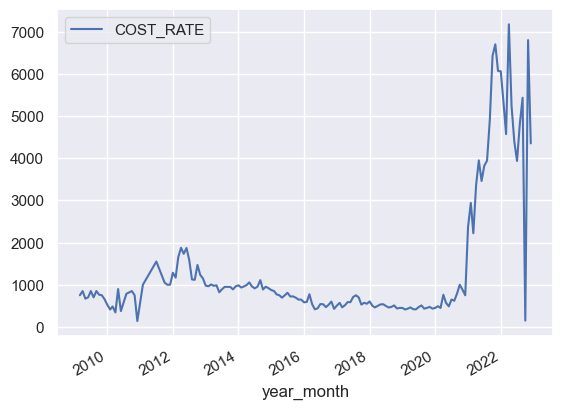

In [160]:
sel_cntr_df.plot()


In [161]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Fit the Auto ARIMA model
model = pm.auto_arima(sel_cntr_df['COST_RATE'], seasonal=True, suppress_warnings=True, error_action="ignore", stepwise=True, trace=True, test='adf')
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.088, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2540.538, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2480.906, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2476.877, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2538.664, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2460.228, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2463.885, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2470.196, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2454.454, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2462.603, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2453.084, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2449.630, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2463.606, Time=0.23 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2445.519, Time=0.30 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -1207.399
Date:                Wed, 01 Feb 2023   AIC                           2436.798
Time:                        16:53:30   BIC                           2470.347
Sample:                             0   HQIC                          2450.424
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     55.4304    340.368      0.163      0.871    -611.678     722.539
ar.L1         -2.2292      0.123    -18.160      0.000      -2.470      -1.989
ar.L2         -2.7602      0.266    -10.390      0.000      -3.281      -2.240
ar.L3         -1.8543      0.251     -7.376      0.000      -2.347      -1.362
ar.L4         -0.7362      0.139     -5.299      0.000      -1.008      -0.464
ma.L1          1.6782      0.156     10.751      0.000       1.372       1.984
ma.L2          1.4575      0.240      6.061      0.000       0.986       1.929
ma.L3          0.5897      0.217      2.721      0.007       0.165       1.014
ma.L4          0.1001      0.184      0.543      0.587      -0.261       0.462
ma.L5          0.2073      0.126      1.647      0.100      -0.039       0.454
sigma2      3.535e+05   4.85e+04      7.295      0.000    2.59e+05    4.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               558.82
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               7.00   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
n_periods = 24

# Create a data frame for the forecast for the next 24 months
index_of_fc = pd.date_range(sel_cntr_df.index[-1], periods = n_periods+1, freq='MS')
fc_df = pd.DataFrame(index=index_of_fc[1:],columns=sel_cntr_df.columns)
fc_df.iloc[1:]

fc_df.head()
fc_df.tail()
fc_df.shape

,COST_RATE
2023-02-01,NaN
2023-03-01,NaN
2023-04-01,NaN
2023-05-01,NaN
2023-06-01,NaN
2023-07-01,NaN
2023-08-01,NaN
2023-09-01,NaN
2023-10-01,NaN
2023-11-01,NaN


,COST_RATE
2023-01-01,NaN
2023-02-01,NaN
2023-03-01,NaN
2023-04-01,NaN
2023-05-01,NaN


,COST_RATE
2024-08-01,NaN
2024-09-01,NaN
2024-10-01,NaN
2024-11-01,NaN
2024-12-01,NaN


(24, 1)

In [184]:
import datetime
start_index = datetime.datetime(2023, 1, 1)
end_index  = datetime.datetime(2024, 12, 1)

# Forecast the future values
forecast = model.predict(n_periods=n_periods)

forecast_array = forecast.values
print(forecast_array)
print(len(forecast_array))

fc_df['COST_RATE'] = forecast_array
fc_df['COST_RATE'] = fc_df['COST_RATE'].apply(lambda x: round(x, 2))
fc_df.head()

[2265.57009934 6360.89520216 2450.09966474 5968.00430537 2946.18176122
 4264.38267313 6078.14509776 1465.2230624  6577.71663934 3635.44589703
 3356.46548229 6071.17522976 2537.02892181 5660.93337382 3679.17862299
 4084.37320424 5515.87675377 2636.68997119 5866.73647386 3716.26433842
 3934.79341086 5569.12043422 2987.74944054 5464.39926638]
24


c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,COST_RATE
2023-01-01,2265.57
2023-02-01,6360.90
2023-03-01,2450.10
2023-04-01,5968.00
2023-05-01,2946.18


<Figure size 2000x800 with 0 Axes>

Text(0.5, 1.0, 'Final Forecast of COST_RATE')

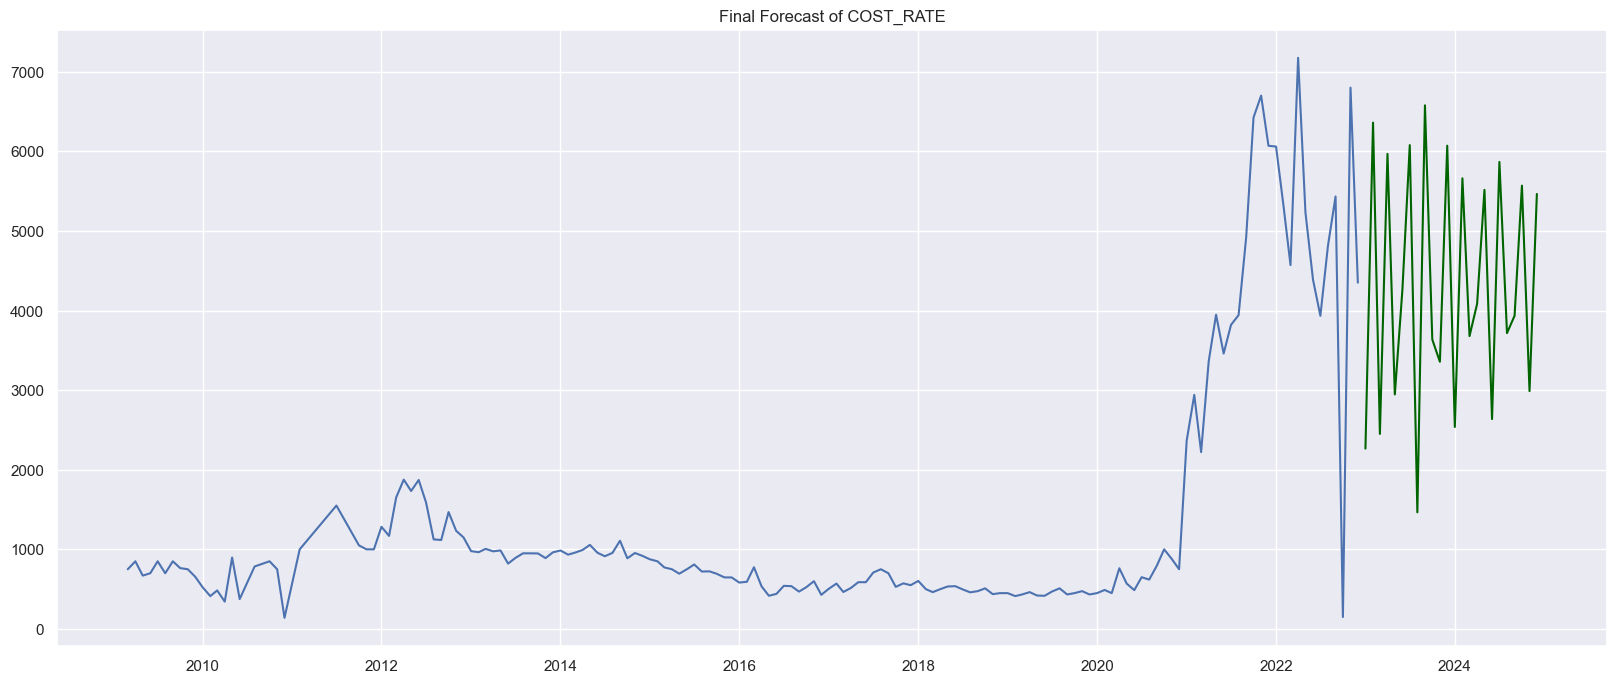

In [186]:
# future_df=pd.concat([sel_cntr_df,fc_df])

# Plot the forecast with current dataset
plt.figure(figsize=(20, 8))
plt.plot(sel_cntr_df)
plt.plot(fc_df, color='darkgreen')
plt.title("Final Forecast of COST_RATE")
plt.show()